<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Trasformazione-dei-dati" data-toc-modified-id="Trasformazione-dei-dati-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Trasformazione dei dati</a></span><ul class="toc-item"><li><span><a href="#Trasformazioni-lineari" data-toc-modified-id="Trasformazioni-lineari-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Trasformazioni lineari</a></span><ul class="toc-item"><li><span><a href="#Cambiamento-di-origine-(traslazione)" data-toc-modified-id="Cambiamento-di-origine-(traslazione)-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Cambiamento di origine (traslazione)</a></span></li><li><span><a href="#Cambiamento-di-scala-(dilatazione-o-contrazione)" data-toc-modified-id="Cambiamento-di-scala-(dilatazione-o-contrazione)-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Cambiamento di scala (dilatazione o contrazione)</a></span></li><li><span><a href="#Cambiamento-di-origine-e-scala" data-toc-modified-id="Cambiamento-di-origine-e-scala-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Cambiamento di origine e scala</a></span></li><li><span><a href="#Standardizzazione" data-toc-modified-id="Standardizzazione-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Standardizzazione</a></span></li><li><span><a href="#Trasformazioni-logaritmiche" data-toc-modified-id="Trasformazioni-logaritmiche-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Trasformazioni logaritmiche</a></span></li></ul></li></ul></li></ul></div>

<div class="header">
D. Malchiodi, Superhero data science. Vol 1: probabilità e statistica: Trasformazione dei dati.
</div>
<hr style="width: 90%;" align="left" />


<div id="h-0"></div>

# Trasformazione dei dati

Può succedere di avere la necessità di trasformare i dati osservati per diverse ragioni: per poterli confrontare con altri riportandoli ad un intervallo predefinito, per poter confrontare la loro distribuzione di frequenza con quella di altri dati, oppure per renderli più facilmente leggibili.

Consideriamo un insieme di valori osservati $X = \{ x_1, x_2, \dots, x_n \}$, con la rispettiva tabella di frequenze relative.

|Valori originali|Frequenze relative|
|----------------|------------------|
| $x_1$          | $f_1$            |
| $x_2$          | $f_2$            |
| $\vdots$       | $\vdots$         |
| $x_n$          | $f_n$            |

Consideriamo anche una trasformazione $g$ che trasforma i valori di $X$ in valori appartenenti all'insieme $Y=\{x_1',x_2',\dots, x_n'\}$: più precisamente $\forall i=1, \dots, n$ si ha $g(x_i) = x_i'$ (quando il nome della funzione si potrà omettere, scriveremo per brevità $x_i \mapsto x_i'$). Prenderemo in esame solo _trasformazioni iniettive_ (per le quali cioè a qualsiasi valore trasformato in $Y$ corrisponde un solo valore in $X$). Per questo tipo di trasformazioni i valori delle frequenze nella tabella delle frequenze per $Y$ rimangono ovviamente i medesimi delle loro preimmagini.

|Valori trasformati|Frequenze relative|
|------------------|------------------|
| $x'_1$           | $f_1$            |
| $x'_2$           | $f_2$            |
| $\vdots$         | $\vdots$         |
| $x'_n$           | $f_n$            |

Cambieranno invece  alcuni indici descrittivi e di conseguenza il grafico della distribuzione: infatti ora i valori  osservati sono quelli dell'insieme $Y$.




<div id="h-1"></div>

## Trasformazioni lineari

Consideriamo la famiglia delle trasformazioni che prevedono di applicare ai dati una funzione _lineare_. Fissate cioè due costanti $a, b \in \mathbb R$, il valore originale $x$ verrà trasformato in un valore $x'$ secondo la regola:

\begin{equation}
x' = g(x) =a \cdot x +b
\end{equation}




<div id="h-2"></div>

### Cambiamento di origine (traslazione)

Se vogliamo traslare i dati di una quantità costante $k>0$ applichiamo la trasformazione
$x \mapsto x'=x - k$ per traslare verso sinistra e $x \mapsto x'=x + k$ per traslare verso destra. Questa trasformazione è utile quando i valori osservati sono molto grandi e poco dispersi. Si osservi che:

- la media, la mediana e i quantili vengono traslati della stessa quantità $k$ (nel medesimo verso);
- il range, la distanza interquartile, la varianza e la deviazione standard dell'insieme traslato $Y$ rimangono invece gli stessi dell'insieme di partenza $X$.

<div class="alert alert-success">
<strong>Esercizio</strong>
Utilizzando le definizione degli indici viste in precedenza, dimostrate le proprietà sopra elencate.
</div>

Vediamo due esempi, caricando innanzitutto il nostro dataset e estraendo da esso le osservazioni per anno di prima apparizione e indice di forza. Per evitare di modificare i dati originali, lavoreremo su delle copie da cui elimineremo inoltre i valori mancanti.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.constants import golden

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(5.0, 5.0/golden))

heroes = pd.read_csv('data/heroes.csv', sep=';', index_col=0)

year = heroes['First appearance'].copy()
year = year[pd.notnull(year)]

strength = heroes['Strength'].copy()
strength = strength[pd.notnull(strength)]

Per applicare una trasformazione a una serie di dati è di norma sufficiente scrivere la corrispondente espressione in funzione della serie stessa. Per esempio, la seguente cella applica agli anni di prima apparizione una funzione in modo che i dati trasformati partano da zero. In questo caso, la costante $k$ coinciderà con il minimo dei valori osservati e la traslazione verrà fatta verso sinistra.

In [9]:
transformed_year = year - min(year)
transformed_year.iloc[:10]

Name
A-Bomb              75.0
Agent Bob           74.0
Abe Sapien          60.0
Abin Sur            26.0
Animal Man          32.0
Angel Salvadore     68.0
Lady Deathstrike    52.0
Yoda                47.0
Absorbing Man       31.0
X-Man               62.0
Name: First appearance, dtype: float64

Analogamente, impostando $k$ alla media campionaria di una serie e traslando verso sinistra, i valori trasformati avranno media campionaria nulla. La cella seguente effettua tale operazione sugli indici di forza.

In [10]:
transformed_strength = strength - strength.mean()
transformed_strength.iloc[:10]

Name
A-Bomb         54.99179
Abraxas        54.99179
Abomination    34.99179
Adam Monroe   -35.00821
Air-Walker     39.99179
Agent Bob     -35.00821
Abe Sapien    -15.00821
Abin Sur       44.99179
Angela         54.99179
Animal Man      4.99179
Name: Strength, dtype: float64

Come già sottolineato, la traslazione è una trasformazione iniettiva e quindi i dati osservati varieranno ma le loro frequenze resteranno uguali. Ciò è evidente se si visualizzano per esempio le tabelle delle frequenze assolute dei dati originali e di quelli trasformati.

In [11]:
pd.crosstab(index=strength,
            columns=['Abs. freqence'],
            colnames=['Original']).iloc[:10]

Original,Abs. freqence
Strength,
5.0,6
10.0,156
15.0,57
20.0,30
25.0,3
30.0,28
35.0,34
40.0,18
45.0,5


In [12]:
pd.crosstab(index=transformed_strength,
            columns=['Abs. freqence'],
            colnames=['Transformed']).iloc[:10]

Transformed,Abs. freqence
Strength,
-40.00821,6
-35.00821,156
-30.00821,57
-25.00821,30
-20.00821,3
-15.00821,28
-10.00821,34
-5.00821,18
-0.00821,5


Analogamente, una visualizzazione grafica dei dati originali avrebbe la stessa forma di quella relativa ai dati trasformati: le frequenze sono infatti invariate, e l'unica differenza consisterebbe nei valori riportati sull'asse delle ascisse. Lo si vede facilmente affiancando per esempio gli istogrammi degli indici di forza originali e trasformati.

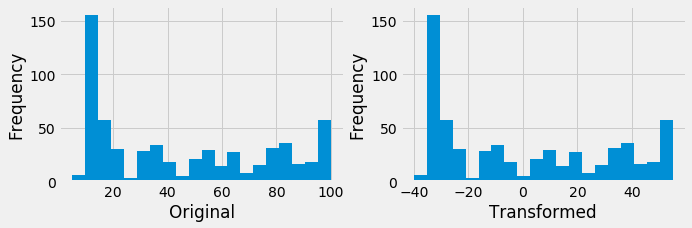

In [13]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
strength.plot.hist(bins=20)
plt.xlabel('Original')
plt.subplot(1, 2, 2)
transformed_strength.plot.hist(bins=20)
plt.xlabel('Transformed')
plt.show()




<div id="h-3"></div>

### Cambiamento di scala (dilatazione o contrazione)

Se vogliamo dilatare o contrarre i valori di un fattore costante $h \in \mathbb R^+$ applichiamo la trasformazione $x \mapsto x' = \frac{x}{h}$. Se $h > 1$ il range dei valori risulta diminuito (è cioè stata applicata una contrazione), mentre se $h < 1$ si applica una dilatazione (il caso $h = 1$ è poco interessante perché la funzione corrispondente lascia i dati inalterati). Inoltre, se $h$ è minore del valore minimo, allora tutti i valori trasformati saranno maggiori di $1$, mentre se $h$ è maggiore del valore massimo, tutti i valori trasformati saranno minori di $1$.

Si osservi che:

- la media, la mediana e i quantili vengono scalati della stessa quantità $\frac{1}{h}$;
- il range di variazione e la distanza interquartile vengono scalati della stessa quantità $\frac{1}{h}$;
- la varianza viene scalata di una quantità $\frac{1}{h^2}$ mentre la deviazione standard viene scalata di $\frac{1}{h}$.

<div class="alert alert-success">
<strong>Esercizio</strong>
Anche in questo caso, dimostrare le proprietà sopra elencate utilizzando le definizioni degli indici coinvolti.
</div>

Come nel caso delle traslazioni, anche per applicare un cambiamento di scala è sufficiente eseguire la corrispondente operazione aritmetica sulla serie coinvolta. Per esempio, nella cella seguente una copia degli indici di forza originali (da cui anche in questo caso vengono eliminati i valori mancanti) vengono contratti utilizzando un fattore per cui $h$ corrisponde al massimo tra i valori originali. Tenuto conto del fatto che questi ultimi sono non negativi, ciò implica che i dati trasformati varieranno nell'intervallo $[0, 1]$.

In [17]:
strength = heroes['Strength'].copy()
strength = strength[pd.notnull(strength)]

transformed_strength = strength / max(strength)
transformed_strength.iloc[:10]

Name
A-Bomb         1.00
Abraxas        1.00
Abomination    0.80
Adam Monroe    0.10
Air-Walker     0.85
Agent Bob      0.10
Abe Sapien     0.30
Abin Sur       0.90
Angela         1.00
Animal Man     0.50
Name: Strength, dtype: float64

Anche in questo caso si verifica facilmente come la tabella delle frequenze varia solo relativamente ai valori osservati, così come gli istogrammi avranno la medesima forma e gli stessi valori sull'asse delle ordinate, ma varieranno su un intervallo diverso se si considera l'asse delle ascisse.

In [18]:
pd.crosstab(index=transformed_strength,
            columns=['Abs. freqence'],
            colnames=['Transformed']).iloc[:10]

Transformed,Abs. freqence
Strength,
0.05,6
0.10,156
0.15,57
0.20,30
0.25,3
0.30,28
0.35,34
0.40,18
0.45,5


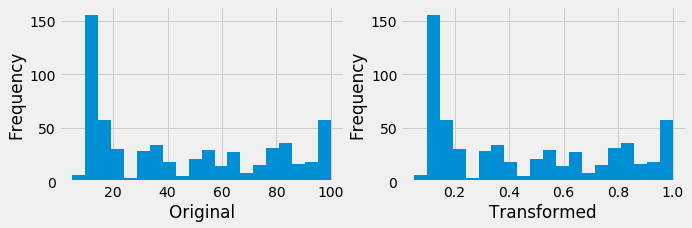

In [19]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
strength.plot.hist(bins=20)
plt.xlabel('Original')
plt.subplot(1, 2, 2)
transformed_strength.plot.hist(bins=20)
plt.xlabel('Transformed')
plt.show()




<div id="h-4"></div>

### Cambiamento di origine e scala

Se abbiamo un insieme di valori nell'intervallo $(a, b)$ e vogliamo adattarli in modo che appartengano all'intervallo $(c, d)$, la trasformazione da applicare sarà 

\begin{equation}
x \mapsto x' = c + \frac{d - c}{b - a} \cdot (x - a).
\end{equation}


<div class="alert alert-success">
<strong>Esercizio</strong>
Utilizzando la formula della retta passante per due punti dati, ricavate la trasformazione.
</div>

Immaginiamo che risulti più pratico misurare la forza dei supereroi in una scala che va da $-10$ a $10$. La trasformazione relativa corrisponderà ai valori $c = -10$, $d = 10$ e rispettivamente al minimo e al massimo dei valori originali per quanto riguarda $a$ e $b$.

In [10]:
strength = heroes['Strength'].copy()
strength = strength[pd.notnull(strength)]

old_min = min(strength)
old_max = max(strength)
new_min = -10.0
new_max = 10.0

transformed_strength = new_min + (new_max - new_min)/(old_max - old_min) * (strength - old_min)
transformed_strength.iloc[:10]

Name
A-Bomb         10.000000
Abraxas        10.000000
Abomination     5.789474
Adam Monroe    -8.947368
Air-Walker      6.842105
Agent Bob      -8.947368
Abe Sapien     -4.736842
Abin Sur        7.894737
Angela         10.000000
Animal Man     -0.526316
Name: Strength, dtype: float64

Ipotizziamo che i valori originali varino nell'intervallo [a,b] e consideriamo i seguenti casi particolari:

- vogliamo trasportare i valori in $[0,1]$: in questo caso la trasformazione da applicare è

\begin{equation}
x \mapsto x' = \frac{x - a}{b - a};
\end{equation}

- nel caso particolare $a = 0$, la trasformazione precedente consiste nel dividere i dati per il valore massimo $b$;
- vogliamo trasportare i valori nell'intervallo $[-1,1]$; la trasformazione sarà pertanto

\begin{equation}
x \mapsto x' = 2 \cdot \frac{x - a}{b - a} - 1.
\end{equation}




<div id="h-5"></div>

### Standardizzazione

La _standardizzazione_ (o _normalizzazione_) è un caso particolare di cambiamento di origine e scala, e consiste nell'applicare una scala il cui fattore è uguale alla deviazione standard dei valori, per poi traslare verso sinistra rispetto alla media dei valori. Se indichiamo rispettivamente con $\overline x$ e con $\sigma_x$ la media campionaria e la deviazione standard campionaria dei valori, la trasformazione  sarà quindi

\begin{equation}
x \mapsto x' = \frac{x - \overline x}{\sigma_x}.
\end{equation}


La trasformazione di standardizzazione trasforma pertanto l'insieme dei valori in un altro insieme di valori la cui media è $0$ e la cui varianza è $1$.

<div class="alert alert-success">
<strong>Esercizio</strong>
Si controlli che le proprietà sopra menzionate sono soddisfatte.
</div>

L'operazione di standardizzazione dei valori di forza dà luogo alla serie seguente:

In [11]:
transformed_strength = (strength - strength.mean()) / strength.std()
transformed_strength.iloc[:10]

Name
A-Bomb         1.664831
Abraxas        1.664831
Abomination    1.059347
Adam Monroe   -1.059845
Air-Walker     1.210718
Agent Bob     -1.059845
Abe Sapien    -0.454361
Abin Sur       1.362089
Angela         1.664831
Animal Man     0.151122
Name: Strength, dtype: float64

Questa trasformazione dovrebbe avere l'effetto di rendere nulla la media campionaria dei dati trasformati.

In [12]:
transformed_strength.mean()

-1.2323657875970539e-16

Il risultato non deve essere particolarmente sconcertante: il fatto di non aver ottenuto un valore _esattamente_ nullo è dovuto al fatto che le operazioni fatte sulle variabili in virgola mobile richiedono di effettuare delle approssimazioni numeriche. In ogni caso, i dati originali hanno un ordine di grandezza che è quindici volte più grande del valore della media campionaria, per cui quest'ultima è per noi essenzialmente equivalente a zero.




<div id="h-6"></div>

### Trasformazioni logaritmiche

A volte i valori di una variabile osservata sono molto grandi oppure molto distanziati. 
In questi casi può essere utile considerare non tanto il valore originale ma, pensando a tale valore come potenza di una data base, ragionare in termini del relativo esponente. Ciò corrisponde ad applicare una _trasformazione logaritmica_ del seguente tipo:

\begin{equation}
x \mapsto x' = \log x.
\end{equation}

La scelta della base del logaritmo in questa trasformazione viene di norma fatta a seconda delle situazioni che si affrontano: scelte comunemente utilizzate sono 10, la costante di Napier $\mathrm e \approx 2.71$ oppure 2.

Nel caso i valori siano molto distanziati tra loro e caratterizzati da una distribuzione di frequenza unimodale fortemente asimmetrica, la trasformazione logaritmica permette di ottenere una distribuzione di frequenza pià simmetrica. Questo tipo di trasformazione ha molti altri vantaggi, dovuti al fatto che l'operazione di prodotto (o quoziente)  tra due valori viene trasformata nella somma (o nella differenza) dei rispettivi logaritmi.

Consideriamo per esempio i primi dieci anni di prima apparizione nel nostro dataset e applichiamo loro una trasformazione logaritmica usando 10 come base.

In [13]:
pd.crosstab(index=np.log10(year),
            columns=['Abs. freqence'],
            colnames=['Transformed']).iloc[:10]

Transformed,Abs. freqence
First appearance,
3.286232,1
3.287578,1
3.287802,9
3.288026,7
3.288473,2
3.288696,2
3.288920,1
3.289366,2
3.289589,1


Anche in questo caso l'iniettività della trasformazione assicura che le frequenze di dati originali e dati trasformati coincidono.

In [14]:
pd.crosstab(index=year,
            columns=['Abs. freqence'],
            colnames=['Original']).iloc[:10]

Original,Abs. freqence
First appearance,
1933.0,1
1939.0,1
1940.0,9
1941.0,7
1943.0,2
1944.0,2
1945.0,1
1947.0,2
1948.0,1


<hr style="width: 90%;" align="left" />
<span style="font-size: 0.8rem;">D. Malchiodi, Superhero data science. Vol 1: probabilità e statistica: Trasformazione dei dati, 2017.</span>
<br>
<span style="font-size: 0.8rem;">Powered by <img src="img/jupyter-logo.png" style="height: 1rem; display: inline; margin-left: 0.5ex; margin-top: 0;" alt="Jupyter Notebook"></span>
<div style="float: left; margin-top: 1ex;">
<img src="http://mirrors.creativecommons.org/presskit/icons/cc.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<img src="http://mirrors.creativecommons.org/presskit/icons/by.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<img src="http://mirrors.creativecommons.org/presskit/icons/nc.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<img src="http://mirrors.creativecommons.org/presskit/icons/nd.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<span style="font-size: 0.7rem; line-height: 0.7rem; vertical-align: middle;">Quest'opera è distribuita con Licenza <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribuzione - Non commerciale - Non opere derivate 4.0 Internazionale</a></span>.
</div>